In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
temp_amb_deg=15

Question pour Guillaume
je ne comprends pas la partie d'interpolation 
-> Briac: peut-être devrais-je regarder comment il a construit le graphique

Toutes les surfaces ne sont pas utilisées

Comment connaitre les surfaces ?
laterale gauche et droite, arriere, vitre uniquement, plancha uniquement

In [ ]:
#Connecting gdrive into the google colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
chemin = '/content/gdrive/My Drive/Colab Notebooks/Données pour le poêle de masse/'
!ls '/content/gdrive/My Drive/Colab Notebooks/Données pour le poêle de masse'

releves-temperatures-de-surface.csv  tableau_si_ti.csv
tableau_ai.csv			     temperature-de-surface.template.csv
tableau_si_ai.csv


In [ ]:
# chargement des données de la flambée 
temperature_surface = pd.read_csv(chemin + 'releves-temperatures-de-surface.csv').drop(0,axis=0)
df_ti = temperature_surface.copy()

# chargement des correspondances entres id des surfaces et id des températures
ai = pd.read_csv(chemin + 'tableau_ai.csv')

# chargement des correspondances entres id des surfaces et id des aires calculées
si_ai = pd.read_csv(chemin + 'tableau_si_ai.csv')

# chargement des aires de références
si_ti = pd.read_csv(chemin + 'tableau_si_ti.csv')

In [ ]:
# Définition des index
temperature_surface.columns = [str(x) +'min' for x in ti.columns]
temperature_surface['ti'] = ['t' + str(x) for x in temperature_surface.index]

# Conversion des unités
ai['surface_m2'] = ai['surface_cm2'] * 1e-4

# Jointure des DataFrame
si_ai_ti = si_ai.merge(ai, left_on='ai', right_on='ai') # On joint la surface de chaque sommet
si_ai_ti = si_ai_ti.merge(si_ti, left_on='si', right_on='si') # On joint le numéro ti correspondant à chaque sommet
df = si_ai_ti.merge(temperature_surface, left_on='ti', right_on='ti')
df

,si,ai,surface_cm2,formule,surface_m2,ti,5min,10min,15min,20min,30min,40min,50min,60min,70min,80min,90min,110min,120min,140min,160min,188min,210min,230min,250min,270min,290min,310min,330min,350min,370min,390min,410min,430min,450min,470min,490min,510min
0,s1,a1,319,11*29,0.0319,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
1,s3,a1,319,11*29,0.0319,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
2,s10,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
3,s19,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
4,s2,a2,408,24*17,0.0408,t1,15,15,18,28,47,64,95,125,127,120,119,110,105,96,88,71,72,66,62,58,55,52,49,46,34,32,30,38,36,34,33,31
5,s4,a4,198,11*18,0.0198,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
6,s6,a4,198,11*18,0.0198,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
7,s13,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
8,s22,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
9,s5,a5,420,36.5*23/2,0.0420,t2,23,44,66,77,103,202,247,202,153,135,122,93,90,65,63,59,54,50,48,44,42,42,38,38,36,35,32,32,31,29,29,27


In [ ]:
# On cherche à obtenir la durée de chaque phase
ti_int = [int(x) for x in df_ti.columns]
decalage = [int(x) for x in df_ti.columns][:-1]
decalage.insert(0,0)
duree = [int(b_elt - a_elt) for a_elt, b_elt in zip(decalage, ti_int)]
df_duree = pd.DataFrame(duree, index=df.columns[6:]).transpose()
print(df_duree)

   5min  10min  15min  20min  30min  ...  430min  450min  470min  490min  510min
0     5      5      5      5     10  ...      20      20      20      20      20

[1 rows x 32 columns]


In [ ]:
# On cherche à obtenir la puissance de chaque phase
def puissance_surfacique(temp_moy_deg, temp_amb_deg=15):
  # Renvoie la puissance surfacique dégagée selon la température

  # Puissance dégagée par convection
  C = 1.2
  n = 1.36
  diff = abs(temp_moy_deg-temp_amb_deg)
  p_surf_conv = max(C * diff ** n,0)
  
  # Puissance dégagée par rayonnement
  sigma = 5.67e-8
  F = 0.8
  zero_K = 273.15
  p_surf_ray = max(sigma*F*( (temp_moy_deg + zero_K)**4 - (temp_amb_deg + zero_K)**4 ),0)

  return p_surf_conv + p_surf_ray

puissance = df.loc[:,df.columns[6:]].applymap(puissance_surfacique)
puissance

,5min,10min,15min,20min,30min,40min,50min,60min,70min,80min,90min,110min,120min,140min,160min,188min,210min,230min,250min,270min,290min,310min,330min,350min,370min,390min,410min,430min,450min,470min,490min,510min
0,0.000000,0.000000,11.853014,40.594376,137.158925,309.225379,624.221823,805.522056,902.035036,853.289589,837.258490,774.219754,743.351456,668.080167,485.139594,471.838315,458.648498,485.139594,445.570498,407.011367,381.872195,345.024441,309.225379,274.496170,274.496170,240.863019,219.065660,197.781484,187.336040,156.810195,146.912841,146.912841
1,0.000000,0.000000,11.853014,40.594376,137.158925,309.225379,624.221823,805.522056,902.035036,853.289589,837.258490,774.219754,743.351456,668.080167,485.139594,471.838315,458.648498,485.139594,445.570498,407.011367,381.872195,345.024441,309.225379,274.496170,274.496170,240.863019,219.065660,197.781484,187.336040,156.810195,146.912841,146.912841
2,0.000000,0.000000,11.853014,40.594376,137.158925,309.225379,624.221823,805.522056,902.035036,853.289589,837.258490,774.219754,743.351456,668.080167,485.139594,471.838315,458.648498,485.139594,445.570498,407.011367,381.872195,345.024441,309.225379,274.496170,274.496170,240.863019,219.065660,197.781484,187.336040,156.810195,146.912841,146.912841
3,0.000000,0.000000,11.853014,40.594376,137.158925,309.225379,624.221823,805.522056,902.035036,853.289589,837.258490,774.219754,743.351456,668.080167,485.139594,471.838315,458.648498,485.139594,445.570498,407.011367,381.872195,345.024441,309.225379,274.496170,274.496170,240.863019,219.065660,197.781484,187.336040,156.810195,146.912841,146.912841
4,0.000000,0.000000,18.574225,99.645566,297.528925,512.075245,985.455758,1544.095520,1584.957703,1443.953220,1424.267821,1252.191250,1160.515409,1002.467498,869.429340,609.820288,624.221823,539.453114,485.139594,432.604696,394.384761,357.191425,321.040665,285.952200,156.810195,137.158925,118.094213,197.781484,177.024230,156.810195,146.912841,127.551561
5,0.000000,0.000000,0.000000,0.000000,11.853014,64.758245,219.065660,263.161871,332.973945,407.011367,445.570498,512.075245,512.075245,512.075245,485.139594,458.648498,394.384761,381.872195,357.191425,357.191425,285.952200,251.950419,240.863019,208.358618,197.781484,177.024230,166.848175,146.912841,137.158925,127.551561,118.094213,108.790760
6,0.000000,0.000000,0.000000,0.000000,11.853014,64.758245,219.065660,263.161871,332.973945,407.011367,445.570498,512.075245,512.075245,512.075245,485.139594,458.648498,394.384761,381.872195,357.191425,357.191425,285.952200,251.950419,240.863019,208.358618,197.781484,177.024230,166.848175,146.912841,137.158925,127.551561,118.094213,108.790760
7,0.000000,0.000000,0.000000,0.000000,11.853014,64.758245,219.065660,263.161871,332.973945,407.011367,445.570498,512.075245,512.075245,512.075245,485.139594,458.648498,394.384761,381.872195,357.191425,357.191425,285.952200,251.950419,240.863019,208.358618,197.781484,177.024230,166.848175,146.912841,137.158925,127.551561,118.094213,108.790760
8,0.000000,0.000000,0.000000,0.000000,11.853014,64.758245,219.065660,263.161871,332.973945,407.011367,445.570498,512.075245,512.075245,512.075245,485.139594,458.648498,394.384761,381.872195,357.191425,357.191425,285.952200,251.950419,240.863019,208.358618,197.781484,177.024230,166.848175,146.912841,137.158925,127.551561,118.094213,108.790760
9,56.495874,263.161871,539.453114,697.862896,1124.622115,3474.647879,4985.748104,3474.647879,2159.182110,1753.062078,1483.666323,951.760191,902.035036,525.709034,498.552005,445.570498,381.872195,332.973945,309.225379,263.161871,240.863019,240.863019,197.781484,197.781484,177.024230,166.848175,137.158925,137.158925,127.551561,108.790760,108.790760,90.663585


In [ ]:
def info_si(s_id):
  # Permet de calculer l'énergie renvoyée par surface
  surface_m2 = float(df.loc[df.loc[:,'si'] == s_id,'surface_m2'])
  temperature_si = pd.DataFrame(df.loc[df.loc[:,'si'] == s_id,df.columns[6:]])
  puissance_si = puissance.loc[df.loc[:,'si'] == s_id,:]
  puissance_si.columns= df.columns[6:]
  energie_si = pd.DataFrame([a * b * surface_m2 * 60 for (a, b) in zip(puissance_si.values.tolist()[0],duree)], index=df.columns[6:]).transpose()

  info_si = pd.concat([df_duree,
             temperature_si,
             puissance_si,
             energie_si])
  info_si.index = ['Durée (min)', 'Température (°C)', 'Puissance (W/m²)', 'Energie (J)']
  
  return info_si

info_si('s33')

,5min,10min,15min,20min,30min,40min,50min,60min,70min,80min,90min,110min,120min,140min,160min,188min,210min,230min,250min,270min,290min,310min,330min,350min,370min,390min,410min,430min,450min,470min,490min,510min
Durée (min),5.0,5.0,5.000,5.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,20.000000,10.000000,20.000000,20.000000,28.000000,22.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
Température (°C),15.0,15.0,14.000,15.0,16.000000,16.000000,23.000000,32.000000,39.000000,49.000000,54.000000,64.000000,65.000000,71.000000,76.000000,74.000000,70.000000,66.000000,62.000000,59.000000,57.000000,52.000000,50.000000,47.000000,45.000000,44.000000,41.000000,39.000000,38.000000,35.000000,35.000000,33.000000
Puissance (W/m²),0.0,0.0,1.200,0.0,5.563641,5.563641,56.495874,137.158925,208.358618,321.040665,381.872195,512.075245,525.709034,609.820288,682.917199,653.351868,595.527910,539.453114,485.139594,445.570498,419.751505,357.191425,332.973945,297.528925,274.496170,263.161871,229.900965,208.358618,197.781484,166.848175,166.848175,146.912841
Energie (J),0.0,0.0,13.608,0.0,126.183381,126.183381,1281.326428,3110.764418,4725.573465,7281.202284,8660.861389,23227.733107,11923.080885,27661.448275,30977.124165,41490.457028,29714.460618,24469.593233,22005.931971,20211.077772,19039.928248,16202.203049,15103.698166,13495.912045,12451.146255,11937.022451,10428.307775,9451.146931,8971.368104,7568.233203,7568.233203,6663.966463


In [ ]:
8

In [ ]:
si_ti['ti'].unique()

array(['t4', 't1', 't7', 't2', 't10', 't3', 't5', 't6', 't8', 't9', 't11',
       't12', 't13', 't14', 't15', 't16', 't17', 't18'], dtype=object)

In [ ]:
df

,si,ai,surface_cm2,formule,surface_m2,ti,5min,10min,15min,20min,30min,40min,50min,60min,70min,80min,90min,110min,120min,140min,160min,188min,210min,230min,250min,270min,290min,310min,330min,350min,370min,390min,410min,430min,450min,470min,490min,510min
0,s1,a1,319,11*29,0.0319,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
1,s3,a1,319,11*29,0.0319,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
2,s10,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
3,s19,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
4,s2,a2,408,24*17,0.0408,t1,15,15,18,28,47,64,95,125,127,120,119,110,105,96,88,71,72,66,62,58,55,52,49,46,34,32,30,38,36,34,33,31
5,s4,a4,198,11*18,0.0198,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
6,s6,a4,198,11*18,0.0198,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
7,s13,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
8,s22,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
9,s5,a5,420,36.5*23/2,0.0420,t2,23,44,66,77,103,202,247,202,153,135,122,93,90,65,63,59,54,50,48,44,42,42,38,38,36,35,32,32,31,29,29,27


In [ ]:
si_ai_ti['Energie (J)'] = 0
for s_id in si_ai_ti['si'].dropna():
  si_ai_ti.loc[si_ai_ti['si']==s_id,'Energie (J)'] = info_si(s_id).sum(axis=1).loc['Energie (J)']

si_ai_ti

,si,ai,surface_cm2,formule,surface_m2,ti,Energie (J)
0,s1,a1,319,11*29,0.0319,t4,6335.459703
1,s3,a1,319,11*29,0.0319,t4,6335.459703
2,s2,a2,408,24*17,0.0408,t1,10774.766199
3,s4,a4,198,11*18,0.0198,t7,2762.891062
4,s6,a4,198,11*18,0.0198,t7,2762.891062
5,s5,a5,420,36.5*23/2,0.0420,t2,13376.635156
6,s8,a5,420,36.5*23/2,0.0420,t3,12557.856831
7,s7,a7,405,11*27+12*9,0.0405,t10,2861.217553
8,s9,a7,405,11*27+12*9,0.0405,t10,2861.217553
9,s10,a10,378,(29+18+27)*(11+24+11)/9,0.0378,t4,7507.221842


In [ ]:
si_ai_ti.loc[si_ai_ti['si']==s_id,'Energie (J)']

35    2923.112364
Name: Energie (J), dtype: float64

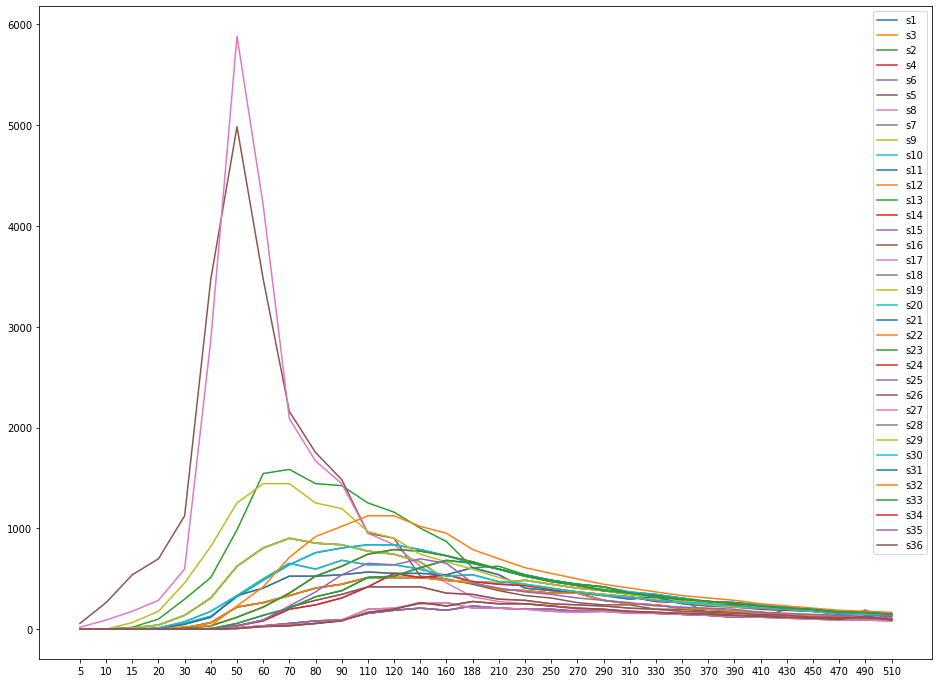

In [ ]:
# Graphique: courbe de degagement de chaleur
#
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
# 'Température (°C)', 'Puissance (W/m²)', 'Energie (J)']
x = ti.columns
for s_id in si_ai_ti['si'].dropna():
  y = info_si(s_id).loc['Puissance (W/m²)',:]
  plt.plot(x, y, label=s_id)

plt.legend()
plt.show()




In [ ]:
ti

,5,10,15,20,30,40,50,60,70,80,90,110,120,140,160,188,210,230,250,270,290,310,330,350,370,390,410,430,450,470,490,510
1,15,15,18,28,47,64,95,125,127,120,119,110,105,96,88,71,72,66,62,58,55,52,49,46,34,32,30,38,36,34,33,31
2,23,44,66,77,103,202,247,202,153,135,122,93,90,65,63,59,54,50,48,44,42,42,38,38,36,35,32,32,31,29,29,27
3,18,27,36,46,70,181,270,225,150,131,120,93,86,72,60,49,45,43,41,38,37,36,35,33,33,31,30,29,28,27,27,26
4,15,15,17,21,32,48,72,84,90,87,86,82,80,75,62,61,60,62,59,56,54,51,48,45,45,42,40,38,37,34,33,33
5,15,15,15,16,23,31,49,62,73,81,84,86,86,83,79,74,70,65,62,59,57,53,51,48,45,44,42,40,38,36,35,34
6,15,15,15,16,22,30,50,56,65,65,66,68,67,67,66,71,66,56,54,52,50,47,49,43,41,40,38,38,36,33,33,31
7,15,15,15,15,17,24,40,44,50,56,59,64,64,64,62,60,55,54,52,52,46,43,42,39,38,36,35,33,32,31,30,29
8,15,15,15,15,17,20,30,40,52,65,72,80,83,82,79,75,70,65,61,58,54,52,49,47,45,43,41,39,37,35,35,33
9,15,15,15,15,15,16,20,26,38,42,48,57,67,64,66,61,59,58,55,53,51,49,45,44,42,42,38,37,36,34,33,32
10,15,15,15,15,15,15,17,20,23,26,27,34,37,39,37,41,39,38,38,36,36,35,34,33,32,30,31,29,29,28,37,27
